In [1]:
# Libs
import pandas as pd
import numpy as np

# Analise gráfica
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# scraping
import requests
from bs4 import BeautifulSoup

# Avisos
import warnings
warnings.filterwarnings('ignore')



In [2]:
# Site dos dados
Url = 'https://pt.wikipedia.org/wiki/Lista_de_pa%C3%ADses_por_PIB_nominal'

print( Url )

https://pt.wikipedia.org/wiki/Lista_de_pa%C3%ADses_por_PIB_nominal


In [3]:
# Scraoubg das tabekas

Tabela_Webs = pd.read_html( Url )

len( Tabela_Webs )

9

In [4]:
Tabela_Webs[2]

País/Território Região ONU FMI[26][27]            Banco Mundial[28]  \
    País/Território Região ONU  Estimativa        Ano        Estimativa   
              Mundo          — 101,560,901       2024        96,100,091   
0    Estados Unidos    América    28781083       2024          23320000   
1             China       Ásia    18532633  [n 1]2024          17820000   
2          Alemanha     Europa     4591100       2024           4280000   
3             Japão       Ásia     4110452       2024           5030000   
4             Índia       Ásia     3937011       2024           3150000   
..              ...        ...         ...        ...               ...   
211           Palau    Oceania     0000226       2022           0000258   
212        Kiribati    Oceania     0000207       2022           0000181   
213           Nauru    Oceania     0000134       2022           0000133   
214      Montserrat    América           —          —                 —   
215          Tuvalu    Oceania     0000064       2022           0000063   

               Nações Unidas[29]             
           Ano        Estimativa        Ano  
          2021        85,328,323       2020  
0         2021          21060000       2020  
1    [n 2]2021          14690000  [n 1]2020  
2         2021           3890000       2020  
3         2021           5060000       2020  
4         2021           2670000       2020  
..         ...               ...        ...  
211       2020           0000264       2020  
212       2020           0000181       2020  
213       2021           0000135       2020  
214          —           0000068       2020  
215       2021           0000055       2020  

[216 rows x 8 columns]

In [5]:
Tabela_PIB = Tabela_Webs[2]

Tabela_PIB.shape

(216, 8)

In [6]:
Tabela_PIB.columns

MultiIndex([(  'País/Território', 'País/Território',       'Mundo'),
            (       'Região ONU',      'Região ONU',           '—'),
            (      'FMI[26][27]',      'Estimativa', '101,560,901'),
            (      'FMI[26][27]',             'Ano',        '2024'),
            ('Banco Mundial[28]',      'Estimativa',  '96,100,091'),
            ('Banco Mundial[28]',             'Ano',        '2021'),
            ('Nações Unidas[29]',      'Estimativa',  '85,328,323'),
            ('Nações Unidas[29]',             'Ano',        '2020')],
           )

In [7]:
Tabela_PIB.drop(columns=['Nações Unidas[29]', 'Banco Mundial[28]'])

Tabela_PIB = Tabela_PIB.drop(columns=['Nações Unidas[29]', 'Banco Mundial[28]'])

In [8]:
Tabela_PIB.columns = ['País/Território', 'Região ONU', 'PIB (Trilhões de US$)', 'Ano']

Tabela_PIB.columns

Index(['País/Território', 'Região ONU', 'PIB (Trilhões de US$)', 'Ano'], dtype='object')

In [9]:
Tabela_PIB = Tabela_PIB.drop(columns=['Ano'])

Tabela_PIB.head()

,País/Território,Região ONU,PIB (Trilhões de US$)
0,Estados Unidos,América,28781083
1,China,Ásia,18532633
2,Alemanha,Europa,4591100
3,Japão,Ásia,4110452
4,Índia,Ásia,3937011


In [10]:
Tabela_PIB['Posição'] = Tabela_PIB.index.get_level_values(0)

Tabela_PIB = Tabela_PIB[['Posição'] + [col for col in Tabela_PIB.columns if col != 'Posição']]

Tabela_PIB

,Posição,País/Território,Região ONU,PIB (Trilhões de US$)
0,0,Estados Unidos,América,28781083
1,1,China,Ásia,18532633
2,2,Alemanha,Europa,4591100
3,3,Japão,Ásia,4110452
4,4,Índia,Ásia,3937011
...,...,...,...,...
211,211,Palau,Oceania,0000226
212,212,Kiribati,Oceania,0000207
213,213,Nauru,Oceania,0000134
214,214,Montserrat,América,—


In [11]:
# Campos Nulos
Tabela_PIB.isnull().sum()

Posição                  0
País/Território          0
Região ONU               0
PIB (Trilhões de US$)    0
dtype: int64

In [12]:
# Verificar campos
Tabela_PIB = Tabela_PIB[ Tabela_PIB['PIB (Trilhões de US$)'] != '—']


In [13]:
# Verificar coluas
Tabela_PIB.dtypes

Posição                   int64
País/Território          object
Região ONU               object
PIB (Trilhões de US$)    object
dtype: object

In [14]:
# Ajustar os valores
Tabela_PIB['PIB (Trilhões de US$)'] = pd.to_numeric( Tabela_PIB['PIB (Trilhões de US$)'] )

Tabela_PIB.head(10)

,Posição,País/Território,Região ONU,PIB (Trilhões de US$)
0,0,Estados Unidos,América,28781083
1,1,China,Ásia,18532633
2,2,Alemanha,Europa,4591100
3,3,Japão,Ásia,4110452
4,4,Índia,Ásia,3937011
5,5,Reino Unido,Europa,3495261
6,6,França,Europa,3130014
7,7,Brasil,América,2331391
8,8,Itália,Europa,2328028
9,9,Canadá,América,2242182


In [15]:
# coleta das imagens
Pagina_Web = requests.get( Url )

#BS4
Coleta = BeautifulSoup( Pagina_Web.text, 'html.parser')

# Tipo
type( Coleta )

bs4.BeautifulSoup

In [16]:
# Capturar as imagens

Imagens = Coleta.find_all('img', attrs={'class' : 'mw-file-element'})

len( Imagens )

218

In [17]:
# Experimento
print('https:' + Imagens[3]['src'])

https://upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Flag_of_Germany.svg/22px-Flag_of_Germany.svg.png


In [18]:
# Extraindo o link da imagem

# Lista para receber os links
Links = []

# Loop
for Link in Imagens:
  # Ajustando o link da imagem
  Link_Imagem = 'https:' + Link['src']
  # Salvando a informação
  Links.append( Link_Imagem )

len( Links)

218

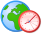

In [19]:
# Libs
from PIL import Image
from io import BytesIO

# Exepirmento
Teste = requests.get( Links[0] )

Image.open(BytesIO(Teste.content))

In [20]:
# Removendo o valor da lista
Links.pop(0)

'https://upload.wikimedia.org/wikipedia/commons/thumb/9/98/Ambox_current_red.svg/42px-Ambox_current_red.svg.png'

In [21]:
# Iniciar o report

# Lista com titulo e rodape
Titulos = ['Top 10 PIBs mundiais']
Rodape = 'Análise feita por Emerson Martins'

# Criar uma figura
Figura = make_subplots(
    rows=1, cols=1, subplot_titles=(Titulos) )

# Update
Figura.update_layout(
    title_text='Lista do Fundo Monetário Internacional',
    height=500,
    showlegend=False,
    title={ 'y': 0.97, 'x': 0.5, 'xanchor':'center', 'yanchor': 'top'}
)

# Grafico
Figura.add_trace(
    go.Bar(
        x=Tabela_PIB['País/Território'].head(10),
        y=Tabela_PIB['PIB (Trilhões de US$)'].head(10),
        text=Tabela_PIB['PIB (Trilhões de US$)'].head(10),
        textposition='auto'
    )
)

# Ajusta no numero do grafico
Figura.update_traces( texttemplate='%{text:.3s}', textposition='outside')

# Variavel da posição da bandeira
Posicao_Direita = 0

# Loop para incluir as imagens
for Loop in Links[0:10]:

  # Requisição
  Link_Imagem = requests.get( Loop )

  # Carregando as imagens / convertendo
  Bandeira = Image.open(BytesIO(Link_Imagem.content))

  # Incluindo um objeto
  Figura.add_layout_image(
      dict(
          source=Bandeira,
          x=0.062 + Posicao_Direita,
          y=-0.15,
          sizex=0.05, sizey=0.05,
          xanchor='right', yanchor='bottom'
      )
    )

  # Ajusta a posição da bandeira
  Posicao_Direita += 0.10

# Mostrando
Figura.show()

In [32]:
# Win
import win32com.client as win32

# Instanciar 
Outlook = win32.Dispatch('outlook.application')

# Criar um e-mail
Email = Outlook.CreateItem(0)

# Destino
Email.To = 'exemplo@email.com; exemplo@email.com; exemplo@email.com'

#Copia
Email.CC = 'exemplo@email.com'

# Copia Oculta
Email.BCC = 'exemplo@email.com'

# Assunto
Email.Subject = 'E-mail com Python!'

# Corpo do E-mail
Email.Body = 'Mensagem do e-mail'

#Local da imagem
Local_Imagem = r'C:\Users\nomedouser\Documentos\estudos\python_para_analise_de_dados\grafico_pib.png'
Email.Attachments.Add( Local_Imagem )

Codigo_HTML = ''' 
<h3> Relatório PIBs mundiais </h3>
<p> Segue análise dos valores em 2024 </p>
<img src="grafico_pib.png"  width=50% alt="Indicador dos PIBS" />
<br>
<p> Qualquer dúvida estou a disposição <i> Emerson Martins </i> </p>
'''

# Incluindo o codigo HTML
Email.HTMLBody = Codigo_HTML

# Enviar um e-mail
Email.Send()